In [144]:
# y = ax + b / a = 기울기(코이피션트, 계수) , b = 절편(인터셉트, 상수)
# 단순회귀 : 독립변수가 1개, 다중회귀 : 독립변수가 여러개

In [145]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\sh070\AppData\Local\Temp\ipykernel_17156\4042747577.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


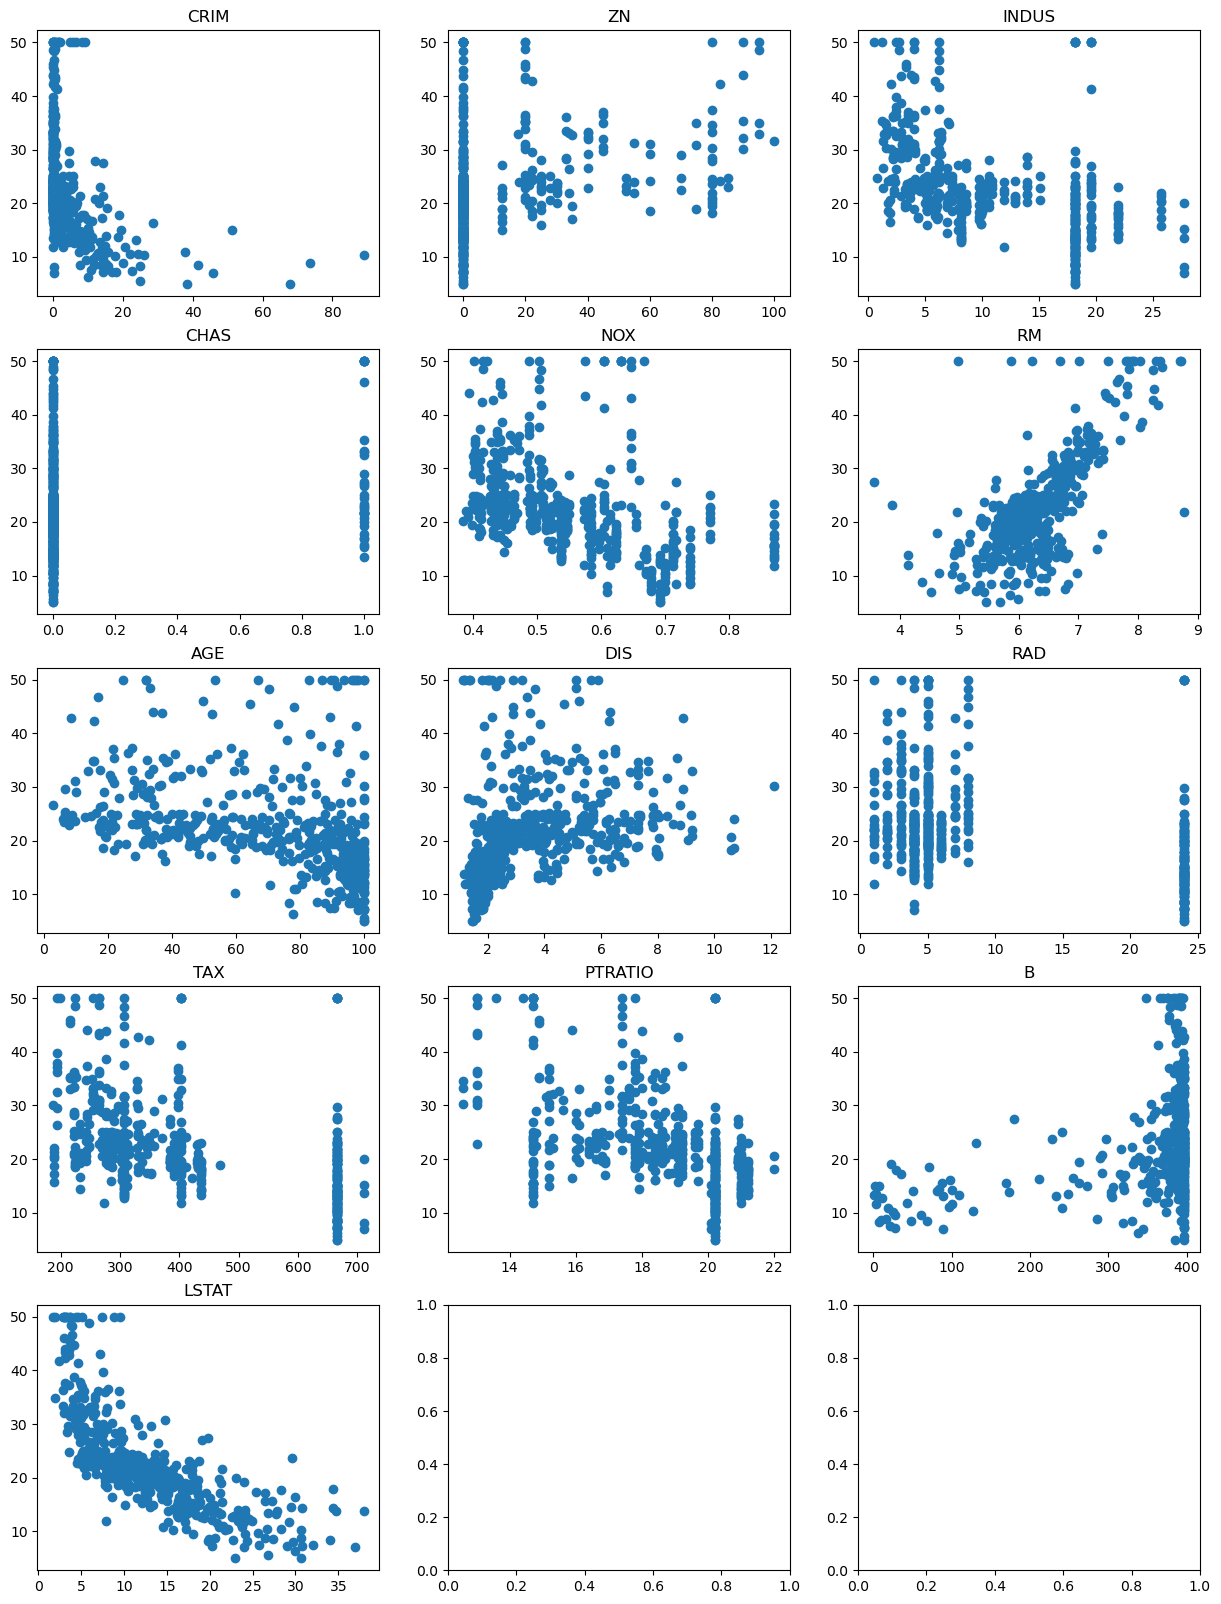

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
y = target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < data.shape[1]:
        x = data[:,i]

        ax.set_title(feature_names[i])
        ax.scatter(x, y)
plt.show()

In [147]:
print(data.shape)

(506, 13)


In [148]:
target.shape

(506,)

In [149]:
df_data = pd.DataFrame(data, columns = feature_names)
df_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [150]:
df_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [151]:
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2) #test_size를 명시하지 않으면 0.25
#일반화 성능을 테스트하기 위해 train과 test를 구분
X_train, X_test, Y_train, Y_test = train_test_split(df_data, target, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [152]:
#simple linear regression *순서 시험에 나옴
from sklearn.linear_model import LinearRegression
# graph에서 RM이 정의 방향으로 유의한 영향을 끼치는 것으로 보이므로, RM을 독립변수로 선택

lr = LinearRegression()  #객체를 생성

lr.fit(X_train[['RM']], Y_train) #기본적으로 LinearRegression은 다중회귀분석을 수행하므로 독립변수가 당연히 여럿일 것을 가정함
# X_train[:, 5]는 하나의 변수에 대한 값들로 이루어진 벡터이므로 에러가 발생
# 에러를 방지하기 위해서는 reshape을 이용해 하나의 변수라 하더라도 행렬 형태로 변환해줘야 함

print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음

LinearRegression()


In [153]:
data[:,5].reshape(-1, 1).shape # -1은 네가 알아서 해라

(506, 1)

In [154]:
lr.fit(X_train[['LSTAT']], Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# LinearRegression은 다중회귀분석 즉 독립변수가 여러개인 모형을 기본으로 하고 있기 때문
print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음 

LinearRegression()


In [155]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #계수 - 즉 기울기
print('intercept_', lr.intercept_) #상수

coef_ [-0.94743689]
intercept_ 34.66774543457531


In [156]:
#모형의 성능 보기
print('R2 score for train set', lr.score(X_train[['LSTAT']], Y_train)) #train set에 대한 적합도 - 모형이 얼마나 잘 맞나

R2 score for train set 0.55717572519647


In [157]:
# test set에 대한 예측
P_test = lr.predict(X_test[['LSTAT']]) #predict 함수를 이용
print(P_test.shape)
print('prediction', P_test)
print('R2 score for test set', lr.score(X_test[['LSTAT']], Y_test)) #test set에 대한 적합도

(102,)
prediction [25.38286391 29.5610606  24.85229926 28.02621284 22.54055324 28.42413633
 27.71355866 24.36910644 30.92536972 19.78351189 28.27254643 31.13380584
 29.66527866 27.8556742  25.37338954 18.89292122 24.91861984 30.28111263
 25.07020974 18.30551035 27.68513556 12.99038939 25.93237731 20.74042315
 28.64204681 23.27007965 22.42686082 15.92744375 25.30706896 14.63892958
 15.93691812 19.37611403 27.28721206 16.89382938 28.45255944 23.94275984
 30.84957477 15.41582783 30.36638195 30.34743322 19.80246063 18.26761287
 22.60687383 16.01271307 30.72640797 22.73004062 12.12822182 24.76702994
 24.27436275 23.98065732 28.52835439 29.65580429 17.56650957 23.31745149
 30.95379283 11.83451639 18.656062   27.46722507 23.6206313   5.65722787
 20.64567946 25.43971013 26.33977517 33.02867962 27.86514857 19.22452413
 20.29512782 23.63010567 25.25969712 22.03841169 15.29266104 24.35963207
 28.44308507 25.49655634 26.04606974 28.33886701 22.69214315 30.31901011
 22.66372004 17.58545831 26.60505

In [158]:
# 단순회귀분석 순서 1. 클래스 import, 2. 객체생성, 3. fit 4. coef_ , intercept_ 5. score 6. predict

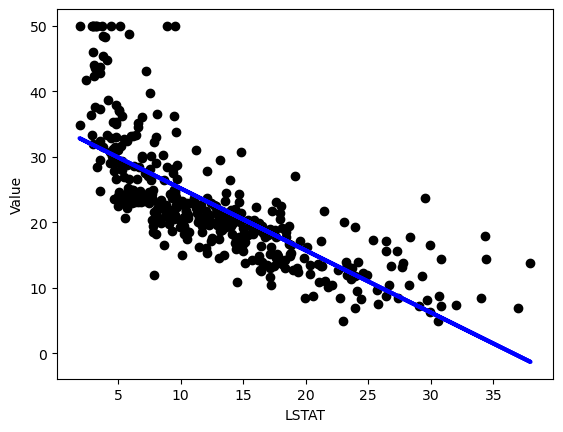

In [159]:
# train set에 대한 graph
Y_predict = lr.predict(X_train[['LSTAT']])
plt.xlabel(feature_names[-1])
plt.ylabel('Value')
plt.scatter(X_train[['LSTAT']], Y_train, color='black') #검은 점은 실제 값
plt.plot(X_train[['LSTAT']], Y_predict, color='blue', linewidth=3) #예측된 값은 직선이 됨
plt.show()

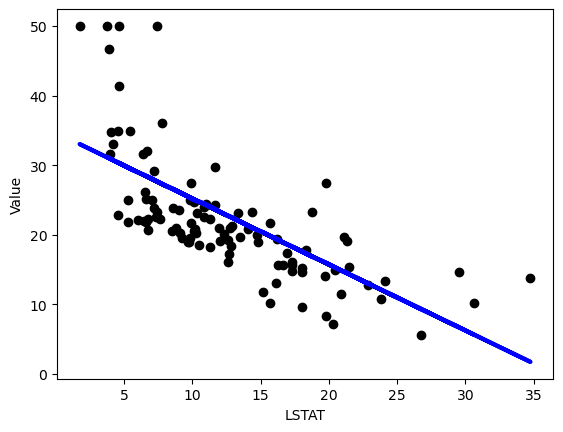

In [160]:
# test set에 대한 graph
Y_predict = lr.predict(X_test[['LSTAT']])
plt.xlabel(feature_names[-1])
plt.ylabel('Value')
plt.scatter(X_test[['LSTAT']], Y_test, color='black')
plt.plot(X_test[['LSTAT']], Y_predict, color='blue', linewidth=3)
plt.show()

In [161]:
#multiple linear regression 예제
lr = LinearRegression().fit(X_train, Y_train)
print(lr) #사용된 parameter를 알 수 있음 

LinearRegression()


In [162]:
print('coef_', lr.coef_) #사용된 모든 독립변수에 대한 계수(기울기)를 반환
print('intercept_', lr.intercept_)

coef_ [-9.91977004e-02  4.47688933e-02  8.33503619e-03  2.92086352e+00
 -1.63874709e+01  3.93481301e+00  7.95511464e-04 -1.36482841e+00
  3.24624256e-01 -1.39730826e-02 -8.72460031e-01  9.07821052e-03
 -5.14397608e-01]
intercept_ 33.58535789548769


In [163]:
print('R2 score for train set: {:.3f}'.format(lr.score(X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(lr.score(X_test, Y_test)))

R2 score for train set: 0.749
R2 score for test set: 0.701


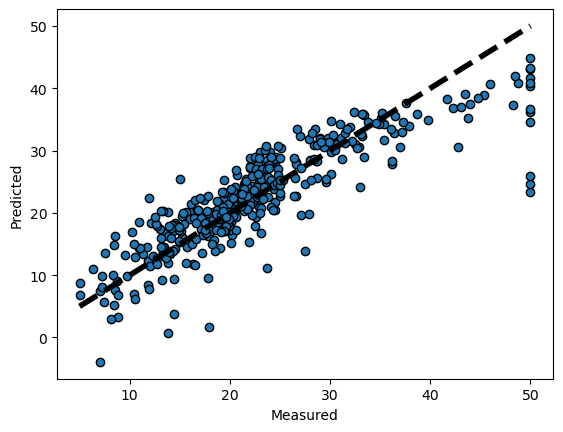

In [164]:
predicted = lr.predict(X_train) #먼저 값을 예측

fig, ax = plt.subplots()
ax.scatter(Y_train, predicted, edgecolors=(0, 0, 0)) #실제값과 예측값으로 점을 찍어 표시 - 둘이 다를 수 있음
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=4) #실제값과 예측값이 같은 지점을 연결해서 선을 표시
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [165]:
#multiple linear regression Standardize 예제
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

StandardScaler()
scaler mean: [3.73151220e+00 1.20272277e+01 1.09910644e+01 7.67326733e-02
 5.52459653e-01 6.29494307e+00 6.82339109e+01 3.82414480e+00
 9.41336634e+00 4.04715347e+02 1.84396040e+01 3.56404975e+02
 1.26985891e+01]
scaler variance: [8.55841119e+01 5.73858170e+02 4.84732937e+01 7.08447701e-02
 1.35517424e-02 4.85636598e-01 8.05350855e+02 4.56073419e+00
 7.57721976e+01 2.86561640e+04 4.71387707e+00 8.70237439e+03
 5.32996710e+01]


In [166]:
slr = LinearRegression()
slr.fit(scaled_X_train, Y_train)
print('coef_', slr.coef_)
print('intercept_', slr.intercept_)

coef_ [-0.91769461  1.07245392  0.05803083  0.77743692 -1.90769747  2.74207799
  0.02257558 -2.91471056  2.82576414 -2.36538181 -1.89423853  0.84687465
 -3.75544326]
intercept_ 22.63663366336634


In [167]:
print('R2 score for train set: {:.3f}'.format(slr.score(scaled_X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(slr.score(scaled_X_test, Y_test)))

R2 score for train set: 0.749
R2 score for test set: 0.701


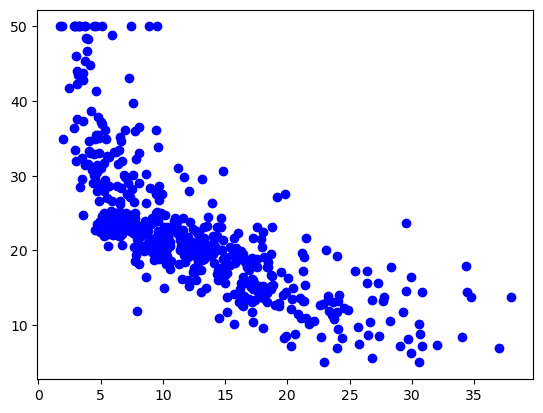

In [168]:
plt.plot(data[:, -1], target, 'bo')
plt.show()

In [169]:
# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(X_train[['LSTAT']], Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train[['LSTAT']], Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test[['LSTAT']], Y_test)))

coef_ [-0.94743689]
intercept_ 34.66774543457531
R2 score for train set: 0.557
R2 score for test set: 0.485


In [170]:
#x제곱을 계산
X2 = X_train['LSTAT']**2
X2.shape

(404,)

In [171]:
X_train_new = np.vstack((X_train['LSTAT'], X2))
X_train_new.shape

(2, 404)

In [172]:
#전치를 해서 새로운 데이터 셋을 생성
X_train_new = X_train_new.T
X_test_new = np.vstack((X_test['LSTAT'], X_test['LSTAT']**2)).T

lr = LinearRegression().fit(X_train_new, Y_train) 

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train_new, Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test_new, Y_test)))

coef_ [-2.29842151  0.04231592]
intercept_ 42.744301054285124
R2 score for train set: 0.651
R2 score for test set: 0.593


In [173]:
X_train_new = X_train_new.T

In [174]:
X_train_new.shape

(2, 404)

In [175]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #2차항까지 생성

X_train_poly = poly.fit_transform(X_train[['LSTAT']])
X_test_poly = poly.transform(X_test[['LSTAT']])

print(X_train_poly.shape, X_test_poly.shape)

(404, 3) (102, 3)


In [176]:
X_train.iloc[:5, [-1]]

,LSTAT
479,13.11
105,16.47
255,9.25
211,23.98
332,7.83


In [177]:
X_train_poly[:5]

array([[  1.    ,  13.11  , 171.8721],
       [  1.    ,  16.47  , 271.2609],
       [  1.    ,   9.25  ,  85.5625],
       [  1.    ,  23.98  , 575.0404],
       [  1.    ,   7.83  ,  61.3089]])

In [178]:
lr = LinearRegression().fit(X_train_poly, Y_train) 

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

coef_ [ 0.         -2.29842151  0.04231592]
intercept_ 42.74430105428498
R2 score for train set: 0.651
R2 score for test set: 0.593


In [179]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #2차항까지 생성
#poly = PolynomialFeatures(degree=2, interaction_only=True) #같은 항의 제곱을 제외하고 다른 항끼리의 곱만으로 생성 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train vs X_train_poly: ', X_train.shape, X_train_poly.shape)

X_train vs X_train_poly:  (404, 13) (404, 105)


In [180]:
lr = LinearRegression().fit(X_train_poly, Y_train)
print('R2 score for polynomial train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
print('R2 score for polynomial test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

R2 score for polynomial train set: 0.932
R2 score for polynomial test set: 0.883


In [181]:
# 곡선이 하나인 경우에는 효과가 있음. 여러개인 경우 효과가 없을 수도.
# 변수에 비해서 데이터가 적으면 과적합이 걸릴 가능성이 높음

In [182]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_poly, Y_train)
#ridge = Ridge(alpha=10).fit(X_train_poly, Y_train)
print('Ridge R2 score for polynomial train set: {:.3f}'.format(ridge.score(X_train_poly, Y_train)))
print('Ridge R2 score for polynomial test set: {:.3f}'.format(ridge.score(X_test_poly, Y_test)))

Ridge R2 score for polynomial train set: 0.928
Ridge R2 score for polynomial test set: 0.852


In [183]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso.coef_ != 0))) #계수가 0이 아닌 독립변수의 수를 출력

Lasso R2 score for polynomial train set: 0.894
Lasso R2 score for polynomial test set: 0.798
Used features count: 57


C:\Users\sh070\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+03, tolerance: 3.469e+00
  model = cd_fast.enet_coordinate_descent(
